In [1]:
using PyPlot
using Distributions
using StatsBase
using GWASTools
using HDF5

In [252]:
Nsnp = 160
Nind = 200
Nhs = 10
hzygosity = 0.4
pop = make_pop(Nsnp,Nind,Nhs,hzygosity)

function make_all_snps_minor!(pop::Matrix)
    select = sum(pop,2) / size(pop)[2] .> 0.5
    pop[select,:] = ~pop[select,:]
    pop
end

function remove_snps_under_maf_threshold(pop::Matrix, threshold::Float64)    
    select = (sum(pop,2) / size(pop)[2]) .> threshold
    pop[select,:]
end

make_all_snps_minor!(pop)
pop = remove_snps_under_maf_threshold(pop, 0.05)

dosage = calc_dosage(pop)

generate sample population ....

# inidviduals  : 200
# chromosomes  : 400
# SNPs         : 160
# generations  : 1600   (4.0 x char. decay)
# hotspots     : 10

mutationrate set to 0.0024814048950054343
corresponding to average heterozygosity : 0.4
evolving population ...100% Time: 0:00:03


158x200 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  1  0  0     1  0  0  1  1  1  0  0  0  0  0  0
 0  1  2  1  1  0  0  1  0  0  1  1  1     0  1  0  0  1  0  1  0  1  1  0  0
 1  1  0  0  2  1  1  1  1  1  1  0  0     0  0  1  0  0  1  0  1  2  1  0  1
 1  2  0  1  1  1  0  1  1  2  0  1  1     1  0  1  0  1  1  0  2  1  0  0  1
 0  1  0  1  1  0  1  0  0  0  1  0  1  …  0  0  0  0  0  1  0  0  1  0  0  1
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  2  0  0  0
 1  0  2  0  1  0  0  2  2  1  0  0  0     0  1  2  1  1  0  1  1  1  0  0  2
 0  0  0  0  0  0  0  0  0  0  1  0  0     1  1  1  0  2  1  0  0  0  0  0  1
 0  2  1  1  1  1  1  0  1  1  0  2  2     0  0  0  0  0  0  1  1  0  1  1  0
 0  1  0  0  2  0  0  0  1  2  0  1  0  …  1  1  0  0  1  1  0  0  1  1  0  1
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  1  1  1  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  1  

In [253]:
snp_dosage_freq = Vector{Float64}[Float64[counts(dosage[i,:],0:2)[j] for i in 1:size(dosage)[1]] / size(dosage)[2] for j in 1:3]

3-element Array{Array{Float64,1},1}:
 [0.775,0.725,0.465,0.44,0.29,0.545,0.835,0.37,0.675,0.52  …  0.255,0.67,0.345,0.57,0.275,0.31,0.65,0.45,0.455,0.325]
 [0.22,0.245,0.455,0.41,0.485,0.35,0.155,0.465,0.285,0.395  …  0.53,0.275,0.48,0.36,0.51,0.535,0.3,0.46,0.435,0.46]  
 [0.005,0.03,0.08,0.15,0.225,0.105,0.01,0.165,0.04,0.085  …  0.215,0.055,0.175,0.07,0.215,0.155,0.05,0.09,0.11,0.215]

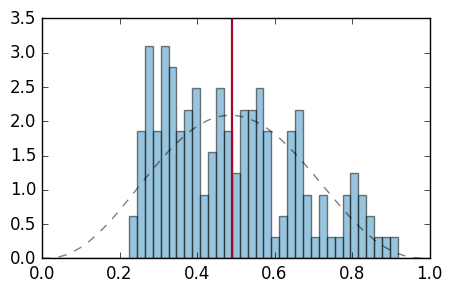

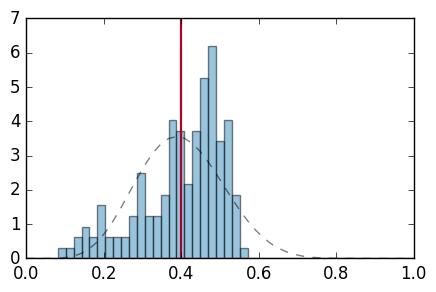

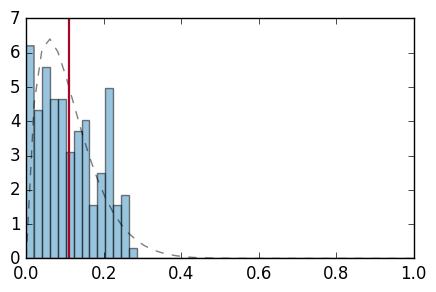

In [255]:
function probhist(sample::Vector)
    @assert 0.0 <= minimum(sample) < maximum(sample) <= 1.0
    
    beta = fit(Beta, sample)
    p = linspace(0,1,50)
    
    fig = plt[:figure](figsize=(5,3))
    ax = fig[:add_subplot](111)
    ax[:hist](sample, p, color=GWASTools.BLUE, alpha=0.5, normed=1)
    ax[:plot](p, pdf(beta,p), "--k", alpha=0.5)
    ax[:plot]([mean(sample),mean(sample)], ax[:get_ylim](),"-",color=GWASTools.RED, lw=1.6)
end
clean_pop!(pop)

probhist(snp_dosage_freq[1]);
probhist(snp_dosage_freq[2]);
probhist(snp_dosage_freq[3]);


In [159]:
heterozygotfreq

1600-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [64]:
fit(Beta, s)

Distributions.Beta(α=0.8993032083879406, β=3.272829514358248)

In [127]:
a = [1,2,2,4,1,2,4,-1]

8-element Array{Int64,1}:
  1
  2
  2
  4
  1
  2
  4
 -1

In [142]:
counts(a,1:3)

3-element Array{Int64,1}:
 2
 3
 0

In [135]:
collect(1:3)

3-element Array{Int64,1}:
 1
 2
 3

In [141]:
1:3

1:3